### Importing the Libraries

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Loading the Original Image

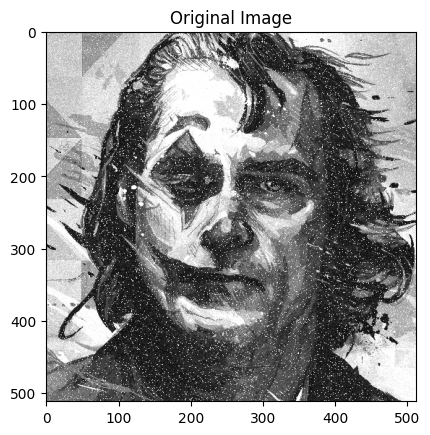

In [29]:
original_image = cv2.resize(cv2.imread('Joker.jpg', 0), (512, 512))
noise = np.random.normal(25, 15, original_image.shape).astype(np.uint8)
original_image = cv2.add(original_image, noise)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

### Fast Fourier Transform (FFT) of the Image

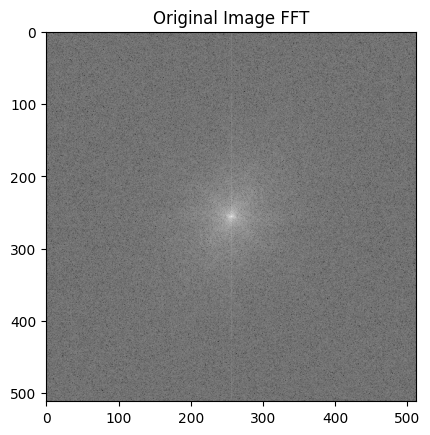

In [41]:
original_image_fft = np.fft.fft2(original_image)
original_image_shifted_fft = np.fft.fftshift(original_image_fft)
original_image_shifted_fft_magnitude_spectrum = np.log(np.abs(original_image_shifted_fft))
plt.imshow(original_image_shifted_fft_magnitude_spectrum, cmap = 'gray')
plt.title("Original Image FFT")
plt.show()

### 4th Order Butterworth Filter

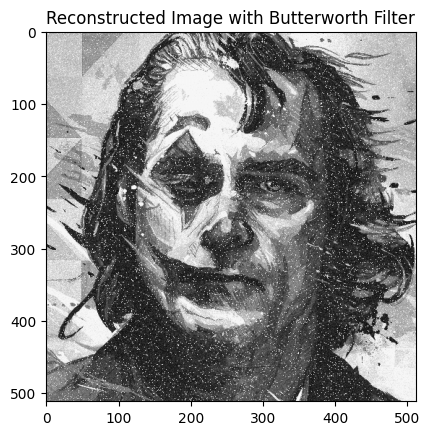

In [50]:
from scipy.signal import butter, freqz, fftconvolve

order = 4

cutoff_frequency = .99  

b, a = butter(order, cutoff_frequency, output = 'ba')

w, h = freqz(b, a)

filtered_magnitude_spectrum = original_image_shifted_fft_magnitude_spectrum * np.abs(h)

filtered_image_shifted_fft = np.exp(filtered_magnitude_spectrum) * np.exp(1j * np.angle(original_image_shifted_fft))

reconstructed_image = np.fft.ifft2(np.fft.ifftshift(filtered_image_shifted_fft)).real

plt.imshow(reconstructed_image, cmap = 'gray')
plt.title("Reconstructed Image with Butterworth Filter")
plt.show()


### Gaussian Filter

In [51]:
from scipy.signal import gaussian



C:\Users\AHNAF SHAHREAR\AppData\Local\Temp\ipykernel_17484\1946348165.py:10: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian_kernel = gaussian(kernel_size, std=sigma)


ValueError: operands could not be broadcast together with shapes (512,512) (41,) 

### Inverse FFT 

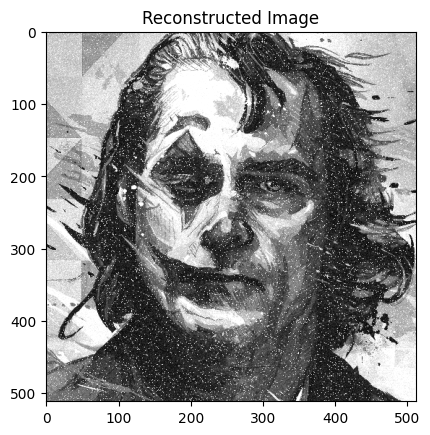

In [48]:
reconstructed_image_shifted_fft = np.fft.ifftshift(original_image_shifted_fft)
reconstructed_image = np.fft.ifft2(reconstructed_image_shifted_fft).real 

plt.imshow(reconstructed_image, cmap = 'gray')
plt.title("Reconstructed Image")
plt.show()